In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import pandas as pd
import glob
import sipm.util.functions as func
from datetime import datetime
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
!pwd

/home/as111/sipm-analysis


In [4]:
# data folder
path = "/scratch/gpfs/as111/results/2023-12-13"
data_spe = {}
channels = np.arange(8)
volt = 98
for ch in channels:
    data_spe[ch] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
    files = glob.glob(f"{path}/*volt_{volt}*laser_waveform_liq5.h5")
    print(files)
    for f in files:
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_spe[ch]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
        if data_spe[ch]['time'].shape[0]==0:
            data_spe[ch]['time'] = np.array(df['time'])
        if np.array(df['n_spe_wfs'])[0]>0:
            if data_spe[ch]['avg_spe_wf'].shape[0]==0:
                data_spe[ch]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            else:
                data_spe[ch]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
    df = None
    if data_spe[ch]['n_spe_wfs']>0:
        data_spe[ch]['avg_spe_wf'] /= data_spe[ch]['n_spe_wfs']

['/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run0_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run5_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run3_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run4_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run8_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run2_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run9_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run6_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run1_laser_waveform_liq5.h5', '/scratch/gpfs/as1

ch0 98V 52299 waveforms selected
ch1 98V 81432 waveforms selected
ch2 98V 71748 waveforms selected
ch3 98V 93174 waveforms selected
ch4 98V 97203 waveforms selected
ch5 98V 80366 waveforms selected
ch6 98V 35761 waveforms selected
ch7 98V 30428 waveforms selected


Text(0.07, 0.5, 'Amplitude (ADC Unit)')

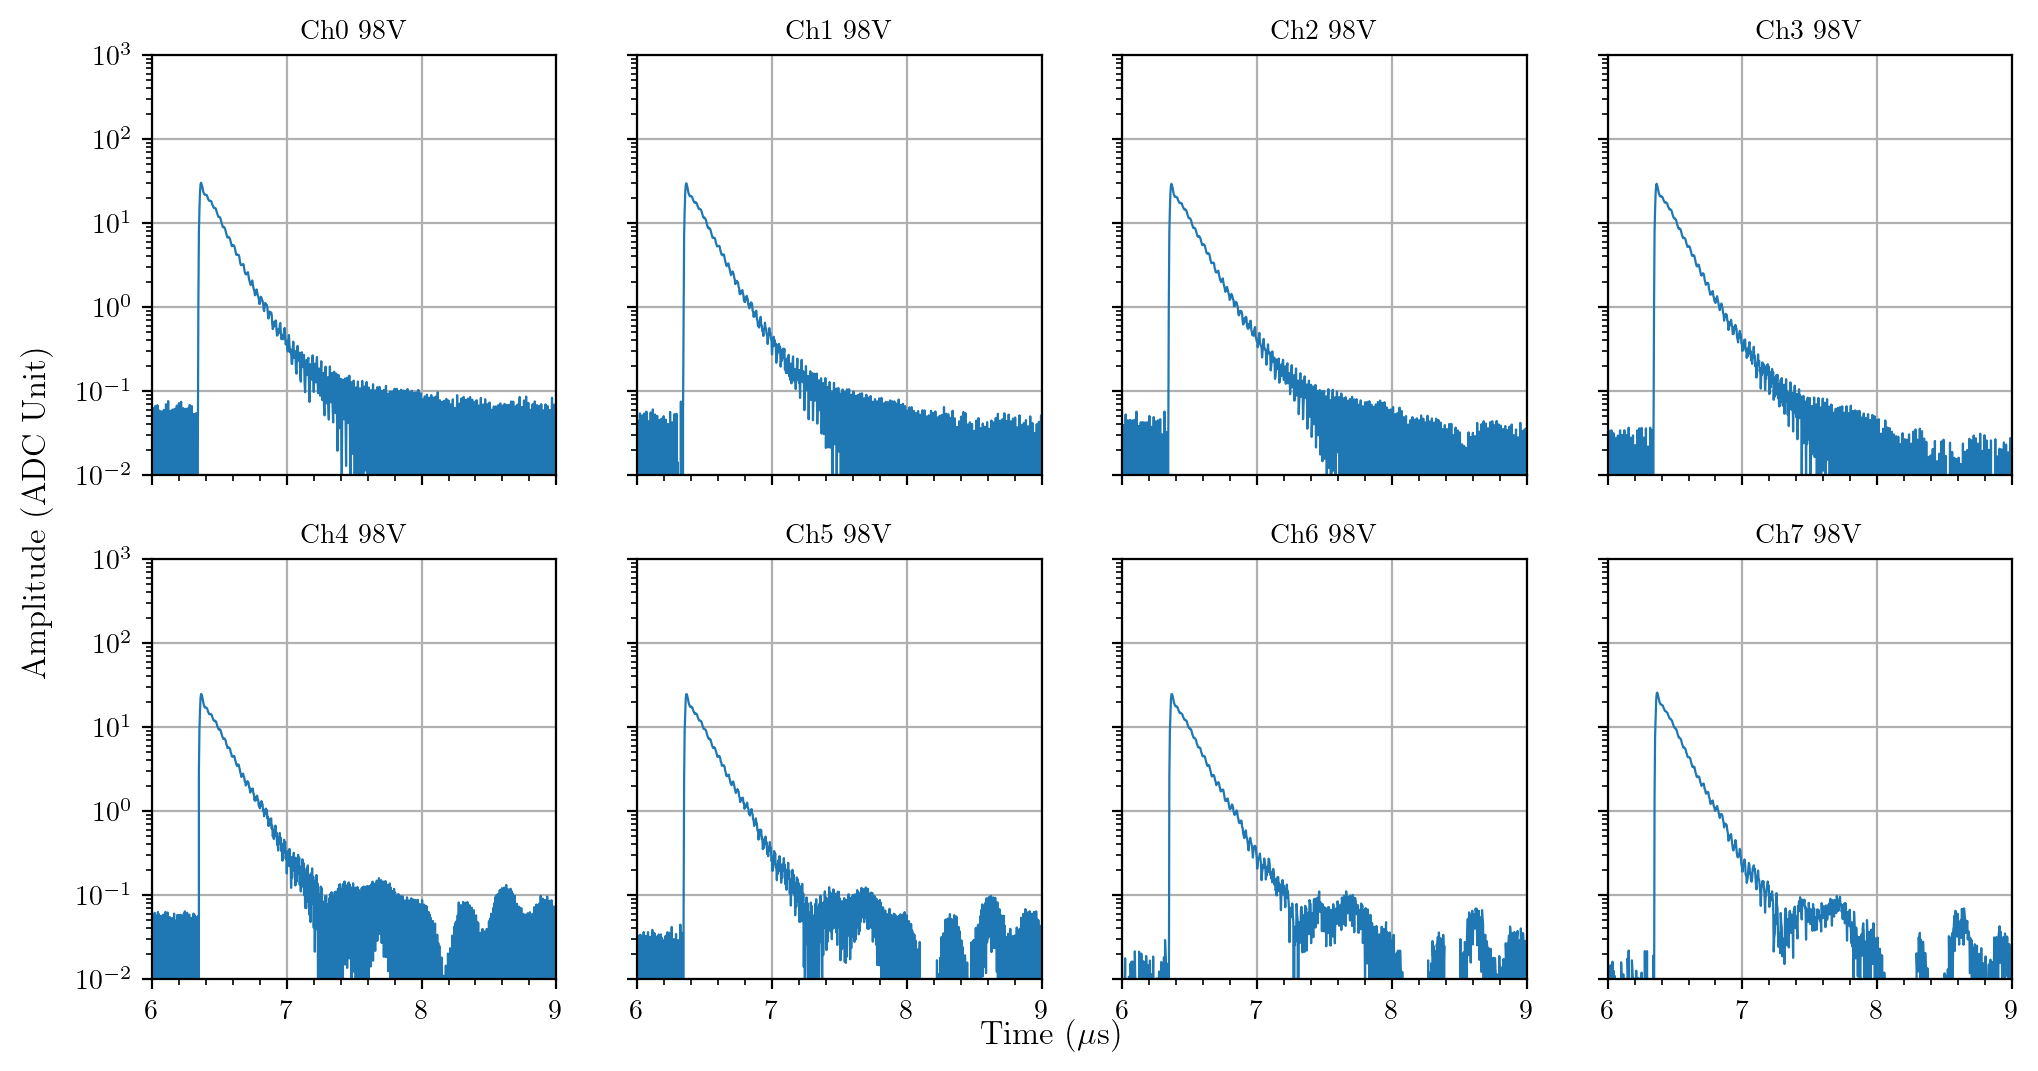

In [5]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    if data_spe[ch]['n_spe_wfs']>0:
        print(f'ch{ch} {volt}V {data_spe[ch]["n_spe_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_spe[ch]['time'],
            data_spe[ch]['avg_spe_wf'],linewidth=0.8)
    axs[j//4, j%4].set_xlim(6, 9)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch} {volt}V')
fig.supxlabel(r'Time ($\mu$s)', y=0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## FFT

Text(0.07, 0.5, 'FFT Abs. Amplitude (ADC Unit)')

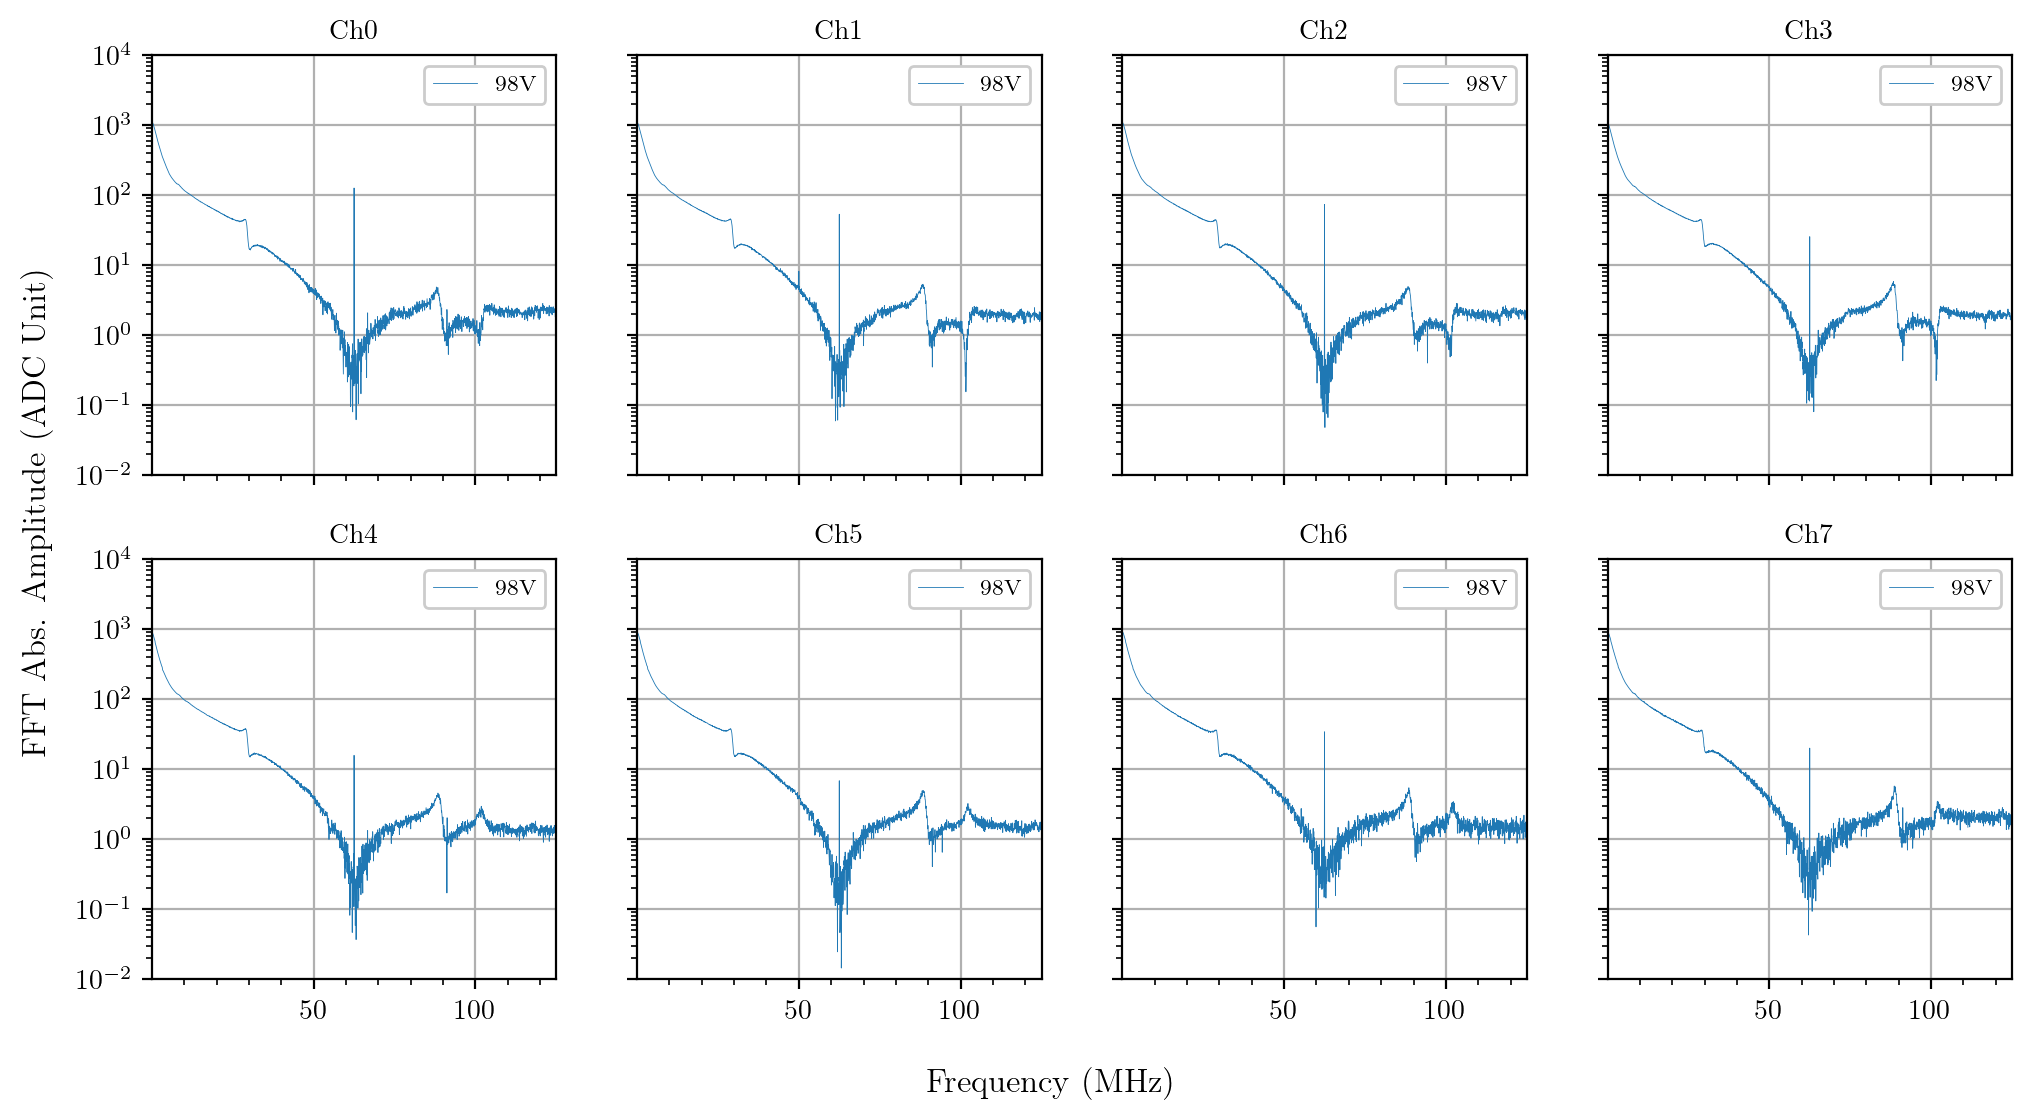

In [6]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    data_spe[ch]['fft_spe_wf'] = fft(data_spe[ch]['avg_spe_wf'])
    dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
    t_total = dt+data_spe[ch]['time'][-1]
    n_over_2 = int(data_spe[ch]['time'].shape[0]/2)
    data_spe[ch]['frequency'] = data_spe[ch]['time']/dt/t_total
    axs[j//4, j%4].plot(
        data_spe[ch]['frequency'][:n_over_2],
        abs(data_spe[ch]['fft_spe_wf'][:n_over_2]),
        label=f'{volt}V', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right')
    axs[j//4, j%4].set_xlim(data_spe[ch]['frequency'][1], data_spe[ch]['frequency'][n_over_2])
    axs[j//4, j%4].set_ylim(1e-2, 1e4)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Frequency (MHz)', y=0.01)
fig.supylabel(r'FFT Abs. Amplitude (ADC Unit)', x=0.07)

# Fit: exponential pulses with time jitter
Scintillation pulse (one component):
$$h(t,t') = A e^{-\frac{t-t'}{\tau}} \Theta(t-t')$$
Time jitter:
$$g(t') = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(t'-t_0)^2}{2\sigma^2}}$$
Average waveform:
$$
f(t,t') = \int g(t') h(t,t') \, dt'
= \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{(t'-t_0)^2}{2\sigma^2}-\frac{t-t'}{\tau}} \, dt'$$

$$ = \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t^{'2} - 2t'(t_0 + \sigma^2/\tau) + t_0^2 + 2\sigma^2 t_0/\tau + \sigma^4 /\tau^2 + 2\sigma^2 (t-t_0)/\tau - \sigma^4/\tau^2]} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sigma\sqrt{2\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t'-(t_0 + \sigma^2/\tau)]^2} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sqrt{\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t/\sigma\sqrt{2}} e^{-[x'-\frac{t_0 + \sigma^2/\tau}{\sigma\sqrt{2}}]^2} \, dx'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{2} e^{-\frac{t-t_0}{\tau}} \left[1 + erf\left(\frac{t-t_0-\sigma^2/\tau}{\sigma\sqrt{2}}\right)\right]
$$
We include two scintillation pulse components with distinct $\tau$.

In [7]:
def template(t, a_1, tau_1, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0)

In [8]:
# Fit SPE average waveform
for j, ch in enumerate(channels):
    pretrg = 5 #us
    err = np.std(data_spe[ch]['avg_spe_wf'][data_spe[ch]['time']<pretrg])
    fit_range = [6.2,7.5] #us
    range_arr = (data_spe[ch]['time']<fit_range[1])&(data_spe[ch]['time']>fit_range[0])
    # print(pos,ch,volt)
    # print(data_spe[pos][ch][volt]['time'][range_arr])
    # print(data_spe[pos][ch][volt]['avg_spe_wf'][range_arr])
    popt,pcov = curve_fit(
        template,
        data_spe[ch]['time'][range_arr], 
        data_spe[ch]['avg_spe_wf'][range_arr], 
        p0=[20, 0.15, 0.005, 6.35], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    data_spe[ch]['pars'] = popt
    data_spe[ch]['cov'] = pcov
    print(popt)

[3.09978444e+01 1.44186287e-01 4.98543328e-03 6.35198728e+00]
[2.98576818e+01 1.45897283e-01 4.78143251e-03 6.35198606e+00]
[2.91092843e+01 1.49812852e-01 4.69644096e-03 6.35153502e+00]
[2.95886277e+01 1.45414900e-01 4.76844381e-03 6.35163753e+00]
[2.44756170e+01 1.46659801e-01 4.63745825e-03 6.35366751e+00]
[2.48016769e+01 1.45701012e-01 4.71951053e-03 6.35401420e+00]
[2.51048752e+01 1.45447319e-01 4.83536352e-03 6.35419334e+00]
[2.63450992e+01 1.39803756e-01 4.89159142e-03 6.35524434e+00]


# Triplet lifetime
Here the average waveforms are deconvolved channel-by-channel using their respective SPE pulse shapes.
The deconvolved waveform is given by
$$f_{deconv}(t) = \mathcal{F}^{-1}\left(\frac{\mathcal{F}(f_{original}(t))}{\mathcal{F}(f_{SiPM}(t))}\right)$$
Note that the SiPM pulse shape has to be shifted such that the trigger for it is at $t=0$.<br>

The average waveforms are selected from the events with $0.1<F_{\rm prompt}<0.5$ and $20<N_{\rm PE}<200$ ($100<N_{\rm PE}<1000$) for the top (bottom), corresponding to an energy range of $100$ keV $\lesssim E \lesssim 1000$ keV

In [9]:
path = "/scratch/gpfs/as111/results/"
dates = ['2024-02-16']
files = []
for d in dates:
    files.extend(glob.glob(f"{path}{d}/*scintillation_waveform_liq6.h5"))
print(files)
print(len(files))

['/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run7_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run5_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run1_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run0_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run2_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run8_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run10_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run3_scintil

In [25]:
# data folder
data_scint = {}
date_time = {}
channels = np.arange(8)
volt = 98
for f in files:
    data_scint[f] = {}
    df = pd.read_hdf(f, key=f'{volt}/-1')
    date_time[f] = datetime(*np.array(df['start_datetime'][:6]).astype(int))
    for ch in channels:
        data_scint[f][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_scint[f][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
        if data_scint[f][ch]['time'].shape[0]==0:
            data_scint[f][ch]['time'] = np.array(df['time'].dropna())
        if data_scint[f][ch]['avg_scint_wf'].shape[0]==0:
            data_scint[f][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        else:
            data_scint[f][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        df = None
        data_scint[f][ch]['avg_scint_wf'] /= data_scint[f][ch]['n_scint_wfs']
# sort according to date time
args = np.array(list(date_time.values())).argsort()
files = np.array(files)[args]

2024-02-16 15:01:09 ch0 4211 waveforms selected
2024-02-16 18:03:58 ch0 4223 waveforms selected
2024-02-16 21:06:44 ch0 4207 waveforms selected
2024-02-17 00:09:30 ch0 4039 waveforms selected
2024-02-17 03:12:20 ch0 4121 waveforms selected
2024-02-17 06:15:04 ch0 4243 waveforms selected
2024-02-17 09:17:55 ch0 4105 waveforms selected
2024-02-17 12:20:35 ch0 4130 waveforms selected
2024-02-17 15:23:17 ch0 4211 waveforms selected
2024-02-17 18:26:01 ch0 4177 waveforms selected
2024-02-17 21:28:51 ch0 4128 waveforms selected
2024-02-18 00:31:36 ch0 4176 waveforms selected
2024-02-16 15:01:09 ch1 4211 waveforms selected
2024-02-16 18:03:58 ch1 4223 waveforms selected
2024-02-16 21:06:44 ch1 4207 waveforms selected
2024-02-17 00:09:30 ch1 4039 waveforms selected
2024-02-17 03:12:20 ch1 4121 waveforms selected
2024-02-17 06:15:04 ch1 4243 waveforms selected
2024-02-17 09:17:55 ch1 4105 waveforms selected
2024-02-17 12:20:35 ch1 4130 waveforms selected
2024-02-17 15:23:17 ch1 4211 waveforms s

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

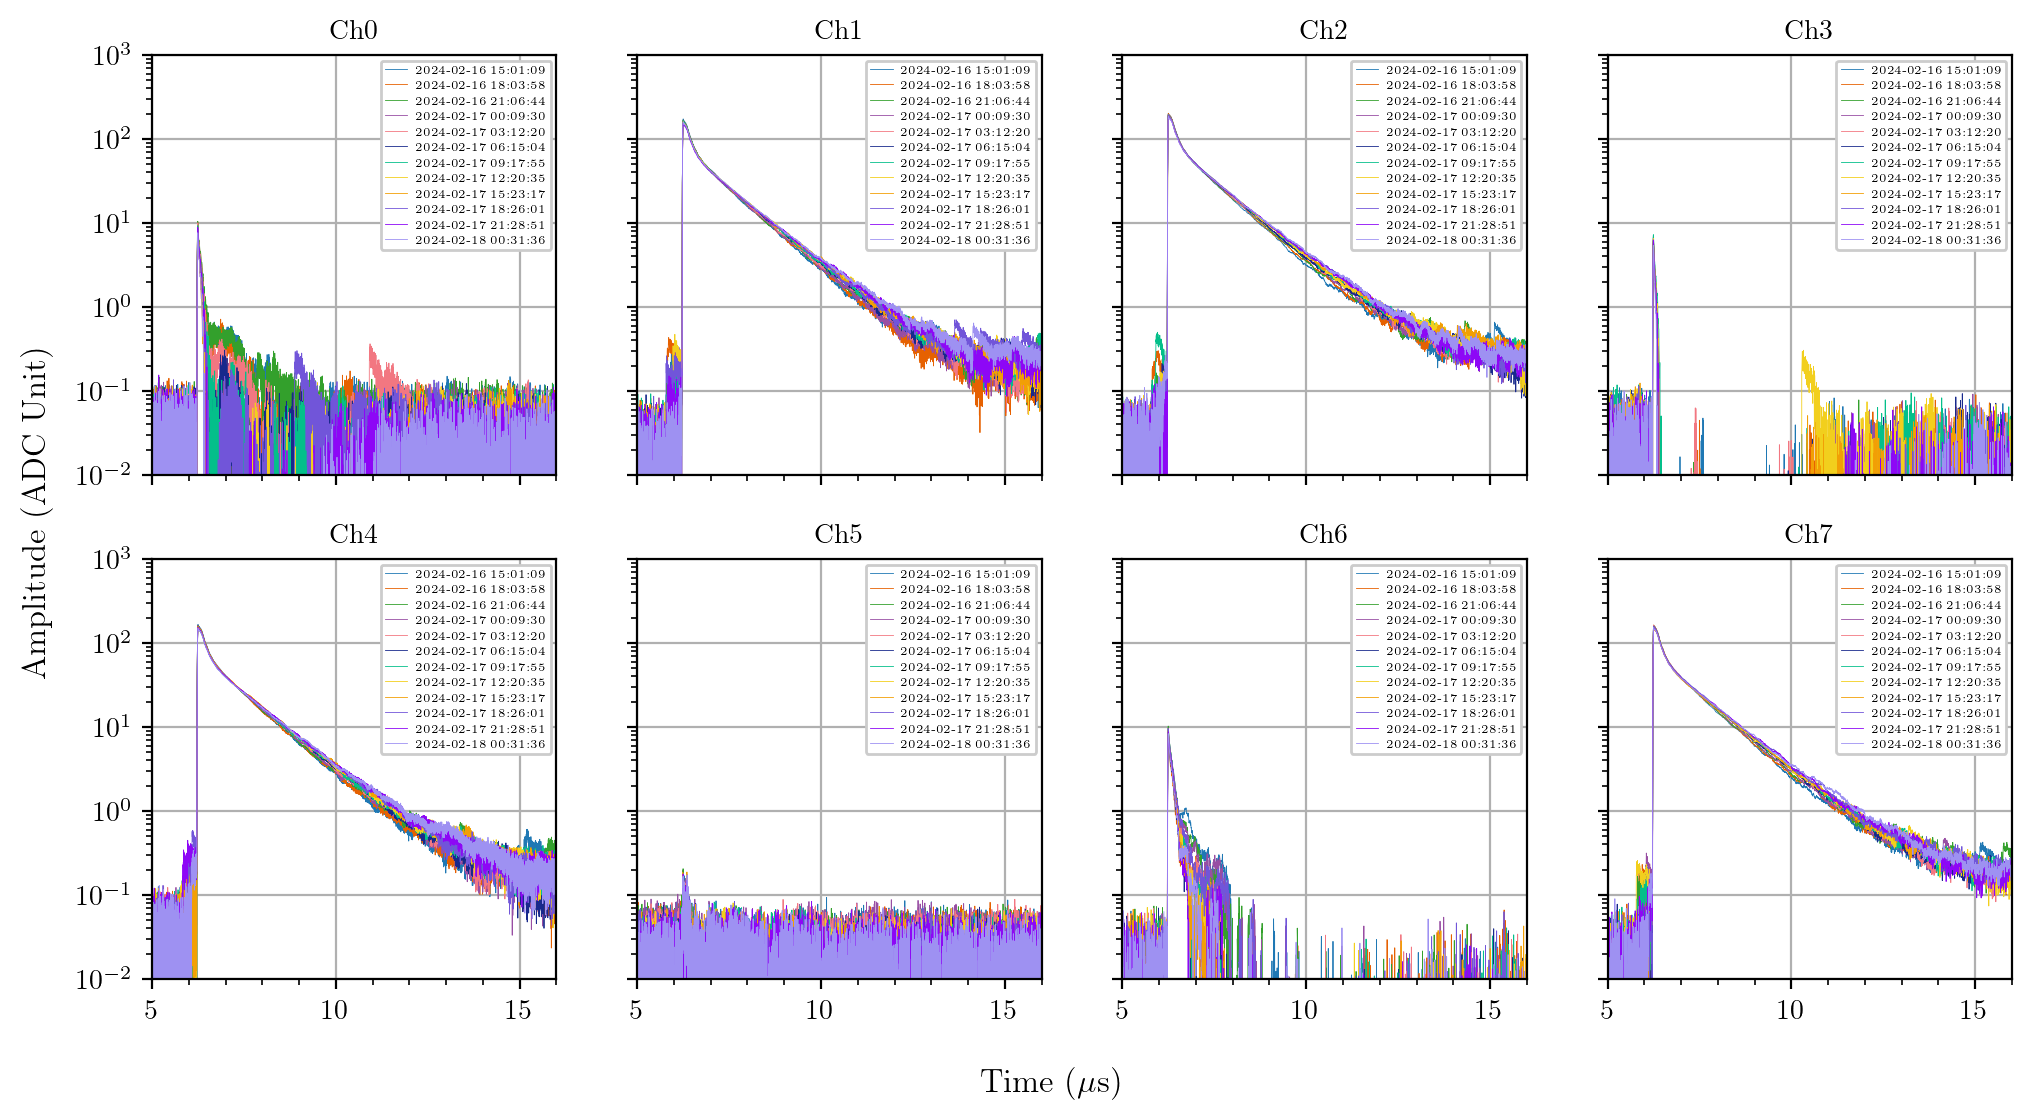

In [26]:
# Make plots for all datasets
# Average LAr scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        print(f'{date_time[f]} ch{ch} {data_scint[f][ch]["n_scint_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_scint[f][ch]['time'],
            data_scint[f][ch]['avg_scint_wf'],
            label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right',fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Deconvolution

In [34]:
# Deconvolution channel by channel
ch_old = [0,5,6,3,4,1,2,7]
for i, f in enumerate(files):
    for j, ch in enumerate(channels):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch_old[ch]]['n_spe_wfs']>0:
            dt = data_spe[ch_old[ch]]['time'][1]-data_spe[ch_old[ch]]['time'][0]
            shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch_old[ch]]['pars'][3]/dt))) for freq in data_spe[ch_old[ch]]['frequency']])
            data_scint[f][ch]['deconv'] = ifft(fft(data_scint[f][ch]['avg_scint_wf'])/data_spe[ch_old[ch]]['fft_spe_wf']*shift).real

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

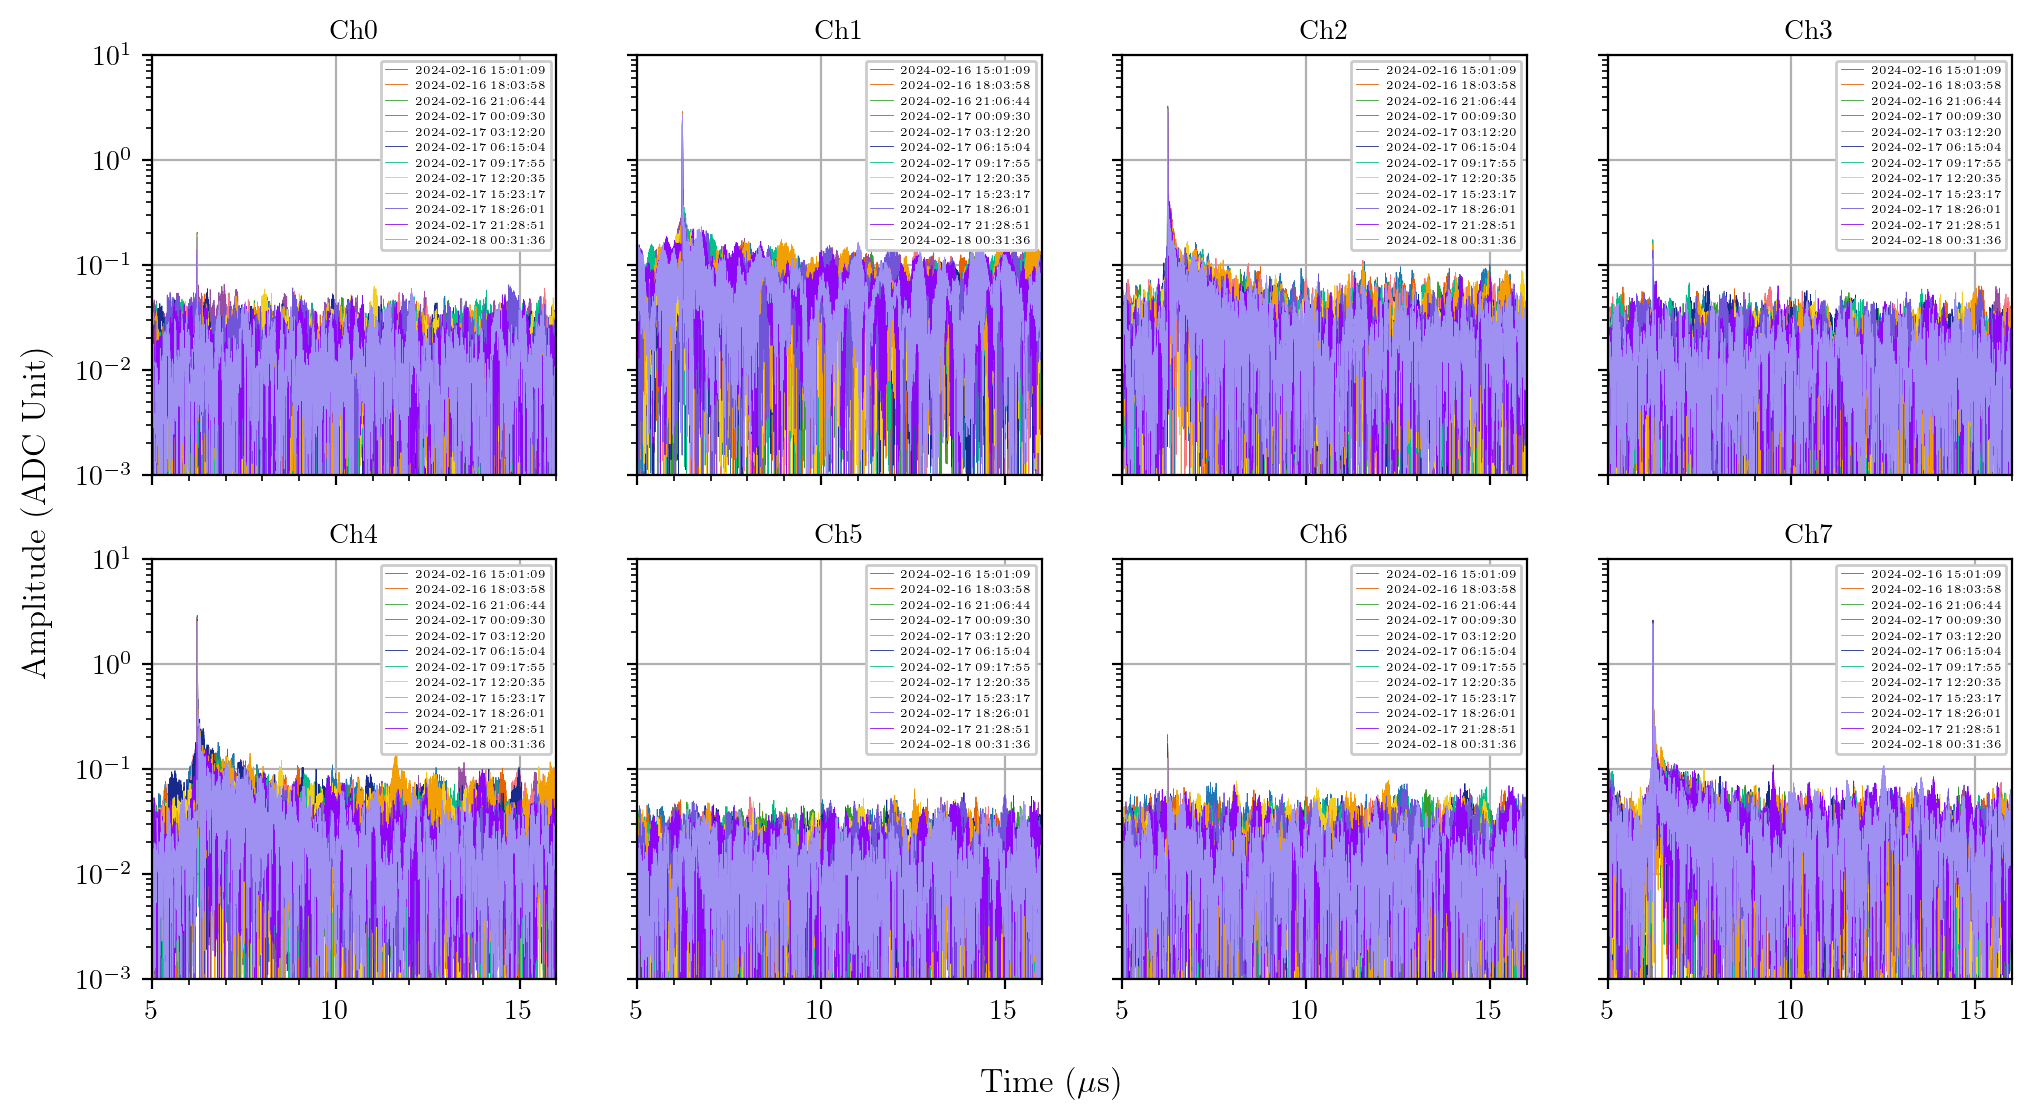

In [35]:
# Make plots for all datasets
# Deconvolved scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            axs[j//4, j%4].plot(
                data_scint[f][ch]['time'],
                abs(data_scint[f][ch]['deconv']),
                label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right', fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-3, 1e1)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Summation
Only sum CH4-7 (without fused silica windows)

In [36]:
for f in files:
    data_scint[f][-1] = {'time': data_scint[f][0]['time'], 'sum_wf': np.zeros(data_scint[f][0]['time'].shape[0])}
    for ch in channels[-4:]:
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            data_scint[f][-1]['sum_wf'] += data_scint[f][ch]['deconv']

Text(0.02, 0.5, 'Amplitude (ADC Unit)')

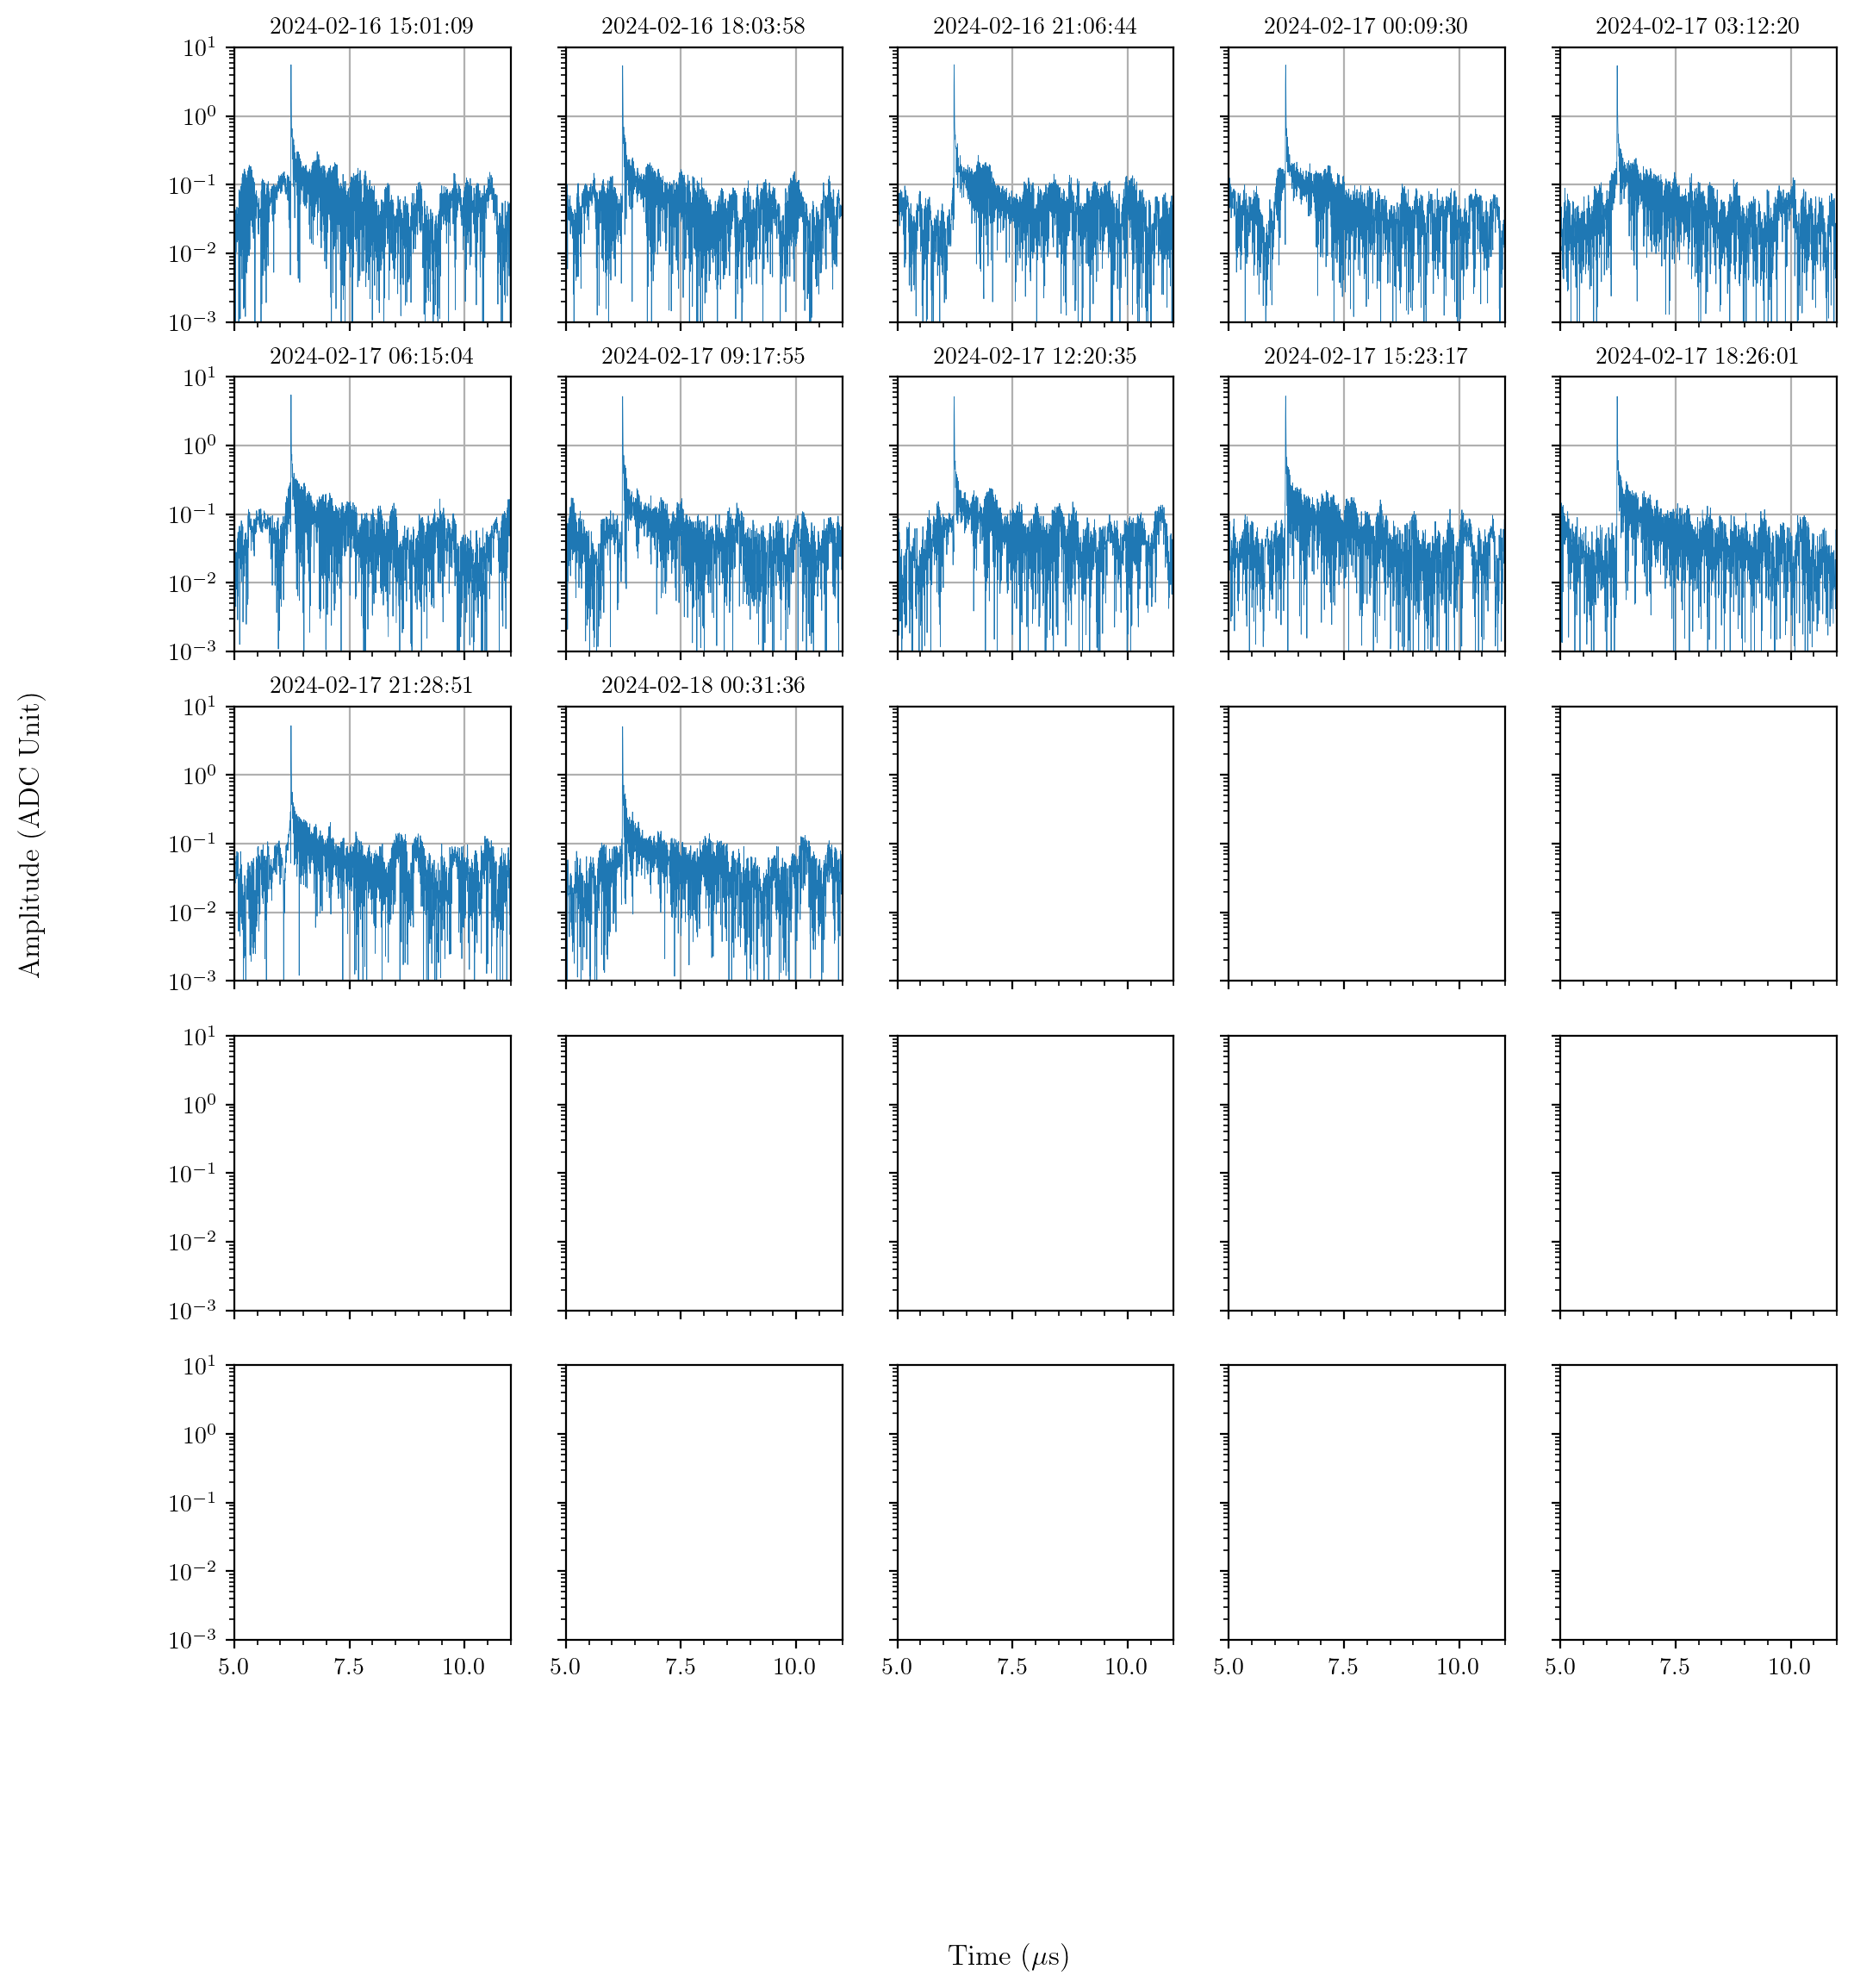

In [37]:
# Make plots for all datasets
# Summed scintillation waveform
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True)
fig.set_size_inches(12, 12)
for i, f in enumerate(files):
    axs[i//5, i%5].plot(
                data_scint[f][-1]['time'],
                abs(data_scint[f][-1]['sum_wf']),
                linewidth=0.3)
    axs[i//5, i%5].set_xlim(5, 11)
    axs[i//5, i%5].set_ylim(1e-3, 1e1)
    axs[i//5, i%5].set_yscale('log')
    axs[i//5, i%5].minorticks_on()
    axs[i//5, i%5].grid()
    axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=-0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.02)

## Fitting

In [38]:
def template2(t, a_1, tau_1, a_2, tau_2, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0) + func.pulse_jitter(t, a_2, tau_2, sigma, t0)

In [39]:
# Fit SPE average waveform
for f in files:
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        pretrg = 5 #us
        err = np.std(data_scint[f][-1]['sum_wf'][data_scint[f][-1]['time']<pretrg])
        fit_range = [6.2,8] #us
        range_arr = (data_scint[f][-1]['time']<fit_range[1]) & (data_scint[f][-1]['time']>fit_range[0])
        popt,pcov = curve_fit(
            template2,
            data_scint[f][-1]['time'][range_arr], 
            data_scint[f][-1]['sum_wf'][range_arr], 
            p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        data_scint[f][-1]['pars'] = popt
        data_scint[f][-1]['cov'] = pcov
        print(f'{date_time[f]} As={popt[0]} Ts={popt[1]}us At={popt[2]} Tt={popt[3]}us sigma={popt[4]}us t0={popt[5]}us')

2024-02-16 15:01:09 As=5.6523716959834465 Ts=0.012413103168905782us At=0.1631944572363365 Tt=0.979260333026098us sigma=0.00013917499207067726us t0=6.224947859191294us
2024-02-16 18:03:58 As=11.368881027468197 Ts=0.0046535514624679395us At=0.21562751997398974 Tt=0.7016227588734787us sigma=0.002383591871161664us t0=6.2291200275619865us
2024-02-16 21:06:44 As=12.829743528621968 Ts=0.004047220535294747us At=0.22362521126079518 Tt=0.6770562596896221us sigma=0.0024582886952003035us t0=6.229359332726273us
2024-02-17 00:09:30 As=5.672186343146846 Ts=0.012849237579930747us At=0.15904866181652605 Tt=1.0319689999871617us sigma=6.211312823384201e-05us t0=6.224176108761306us
2024-02-17 03:12:20 As=11.594423039505308 Ts=0.004481213632519136us At=0.21634003608565094 Tt=0.7153649538460295us sigma=0.0024446348526009037us t0=6.229300596793695us
2024-02-17 06:15:04 As=5.691730365512238 Ts=0.012521211869601116us At=0.15613373436304456 Tt=1.0587608261622483us sigma=7.773650714069392e-05us t0=6.224136623271

/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in exp
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2
/home/as111/sipm-analysis/sipm/util/functions.py:24: RuntimeWarning: invalid value encountered in multiply
  return a*np.exp(sigma**2/2/tau**2)*np.exp(-(t-t0)/tau)*(1+erf((t-t0-sigma**2/tau)/sigma/np.sqrt(2)))/2


Text(-0.01, 0.5, 'Amplitude (ADC Unit)')

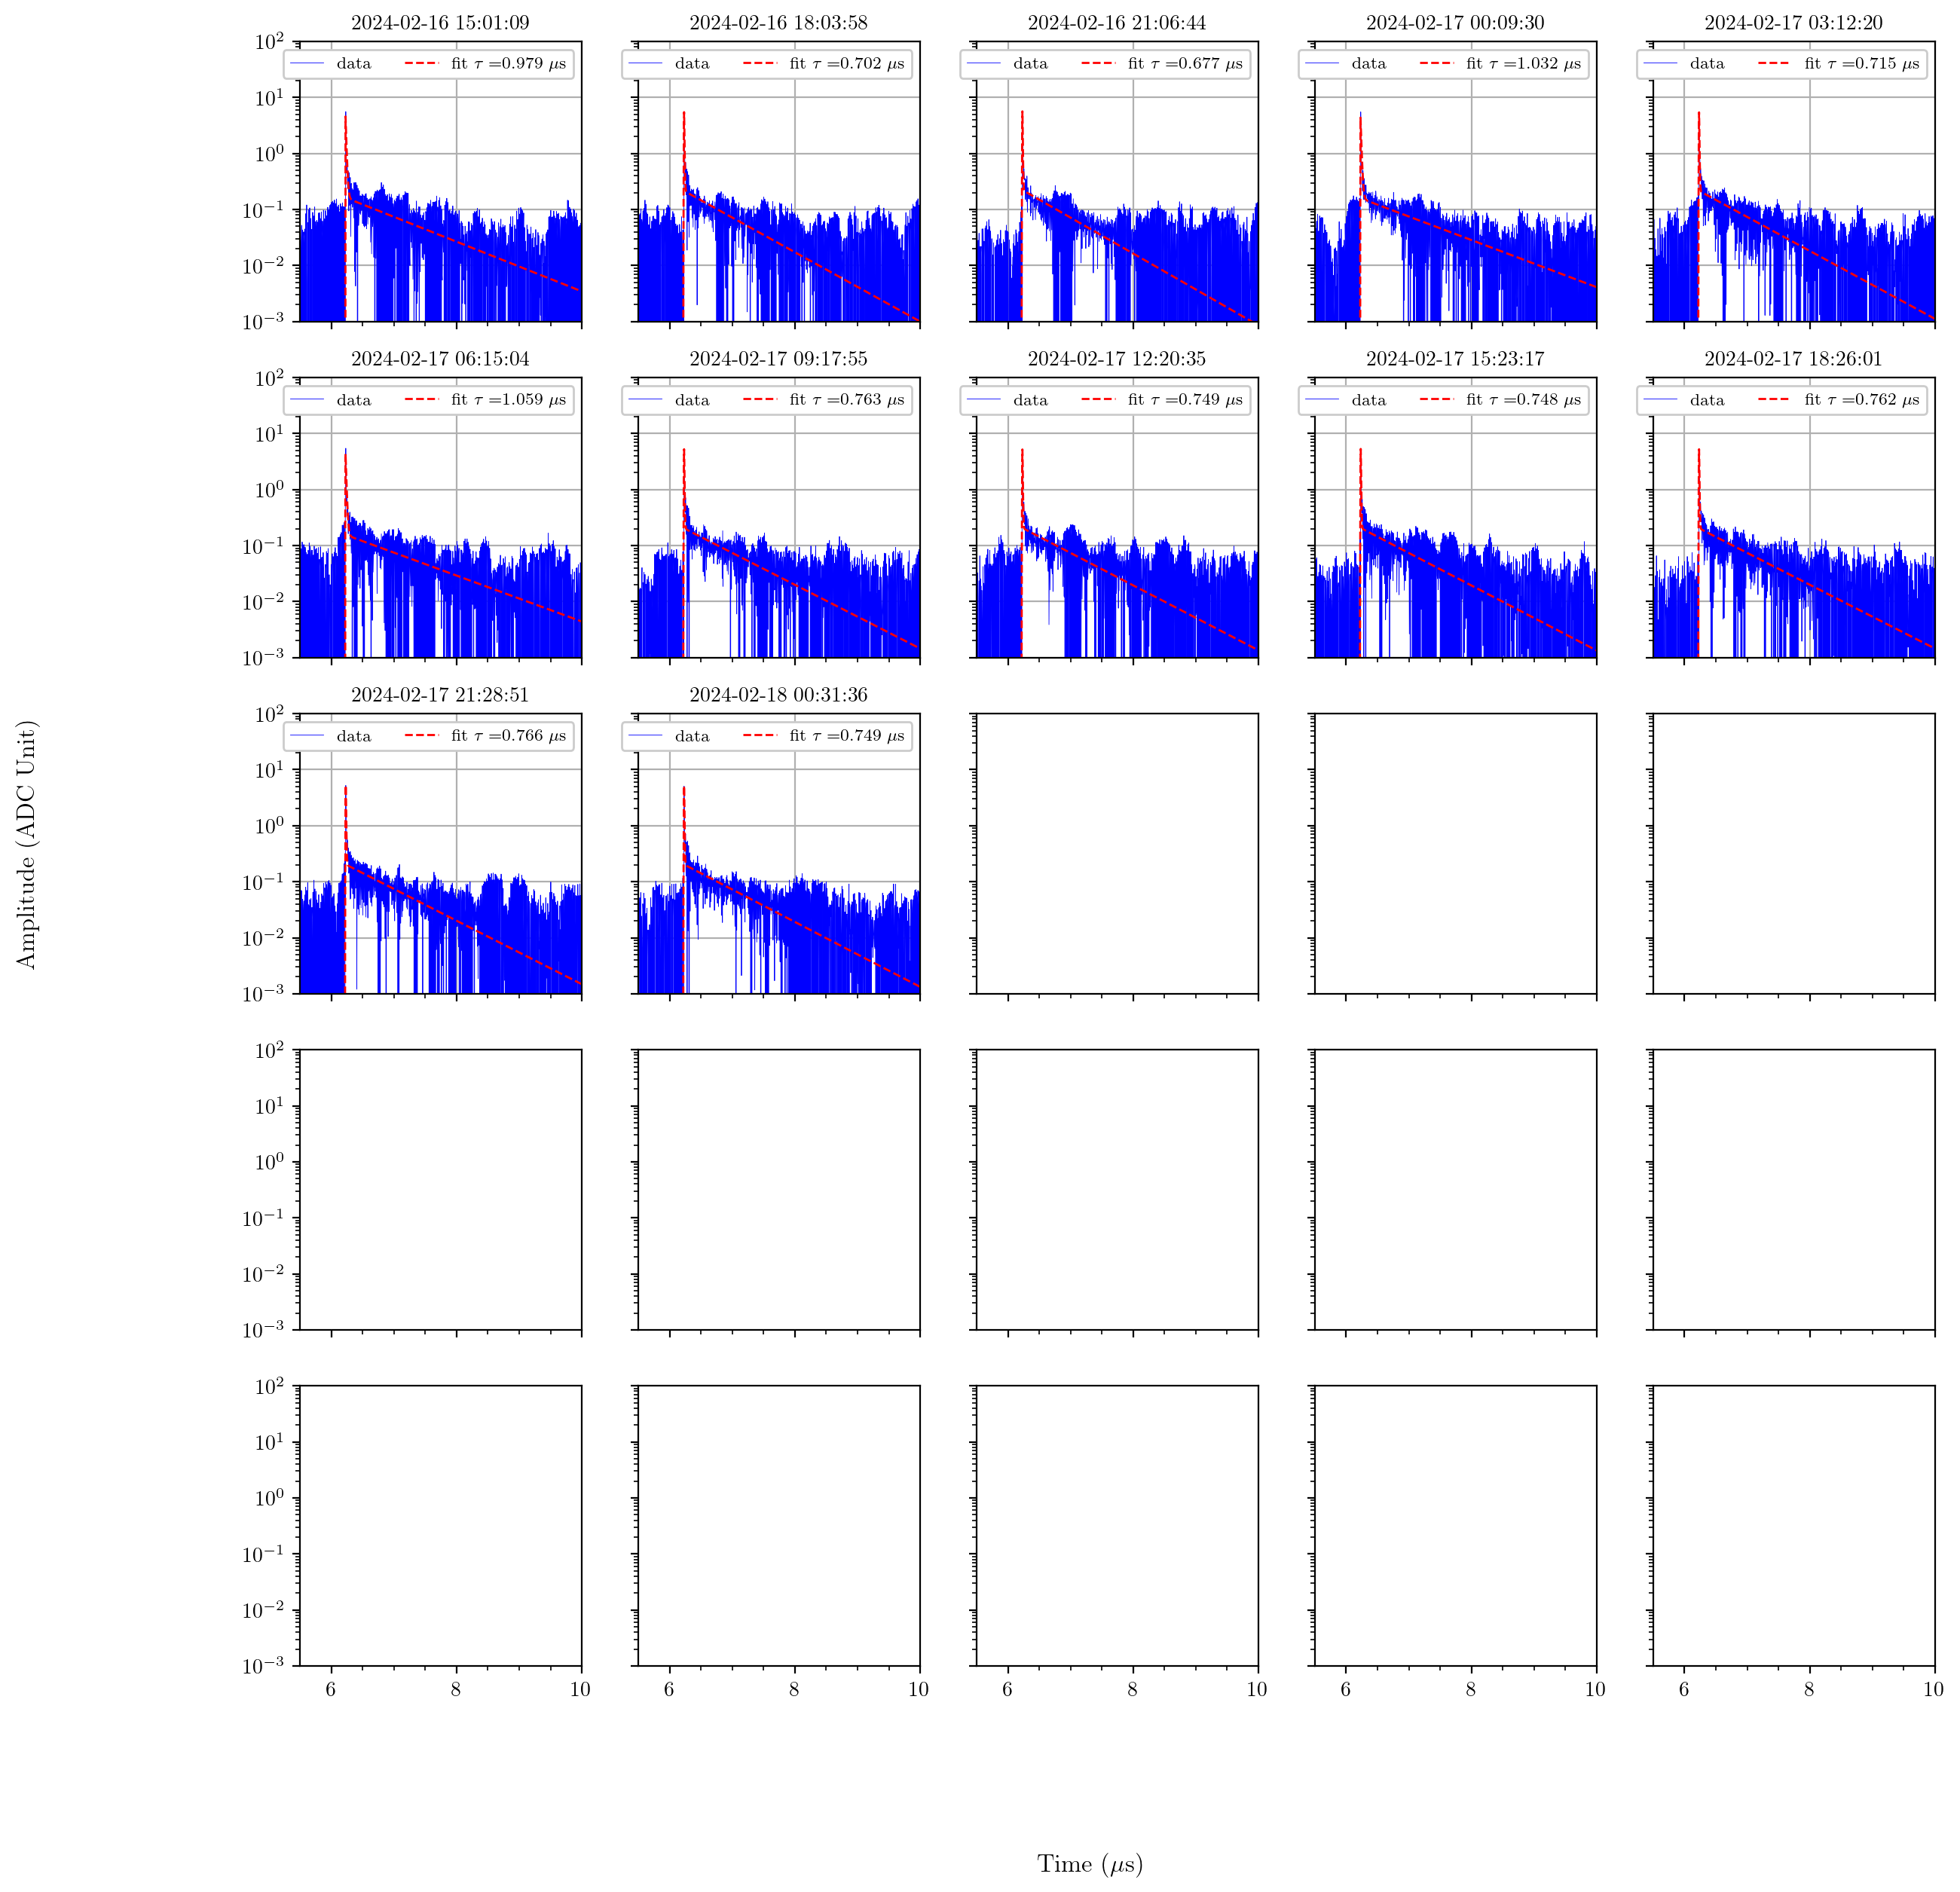

In [40]:
# Make plots for all datasets
# Fitted SPE average waveform
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True)
fig.set_size_inches(14, 14)
for i, f in enumerate(files):
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time'],
            data_scint[f][-1]['sum_wf'],
            label=f'data', color='b', linewidth=0.3)
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time'],
            template2(data_scint[f][-1]['time'], *data_scint[f][-1]['pars']),
            label=r'fit $\tau=${:.3f} $\mu $s'.format(data_scint[f][-1]['pars'][3]), color='r', linestyle='--', linewidth=1)
        axs[i//5, i%5].legend(loc='upper right',ncol=2)
        axs[i//5, i%5].set_xlim(5.5, 10)
        axs[i//5, i%5].set_ylim(1e-3, 1e2)
        axs[i//5, i%5].set_yscale('log')
        axs[i//5, i%5].minorticks_on()
        axs[i//5, i%5].grid()
        axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=-0.01)

# Triplet lifetime evolution

Get folder paths and days since the getter was turned on

In [41]:
dt_getter = datetime(2024,2,14,15,0,0)
print('The getter was turned on at', dt_getter)

The getter was turned on at 2024-02-14 15:00:00


In [42]:
files

array(['/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run0_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run1_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run2_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run3_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run4_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run5_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-16_volt_98_light_scintillation_cond_gamma_run6_scintillation_waveform_liq6.h5',
       '/scratch/gpfs/as111/results/2024-02-16/2024-02-

In [43]:
# Sort datasets
S_PER_DAY = 86400
directory = '/scratch/gpfs/as111/results/'
positions = ['top','bottom']
datetime_files = {}
for f in files:
    df = pd.read_hdf(f, key=f'98/-1')
    date_time = datetime(*np.array(df['start_datetime']).astype(int))
    days = (date_time-dt_getter).total_seconds()/S_PER_DAY
    datetime_files[days] = f
sorted_keys = list(datetime_files.keys())
sorted_keys.sort()

In [44]:
data_spe[0]

{'n_spe_wfs': 52299.0,
 'avg_spe_wf': array([-0.05573585,  0.023367  ,  0.06369282, ...,  0.00866309,
         0.07541389, -0.0319113 ]),
 'time': array([0.0000e+00, 4.0000e-03, 8.0000e-03, ..., 1.5988e+01, 1.5992e+01,
        1.5996e+01]),
 'fft_spe_wf': array([1117.77578473   -0.j        , -937.56744166 -625.69842634j,
         431.59209934+1023.72361015j, ...,  210.66105226+1077.74694369j,
         431.59209934-1023.72361015j, -937.56744166 +625.69842634j]),
 'frequency': array([0.000000e+00, 6.250000e-02, 1.250000e-01, ..., 2.498125e+02,
        2.498750e+02, 2.499375e+02]),
 'pars': array([3.09978444e+01, 1.44186287e-01, 4.98543328e-03, 6.35198728e+00]),
 'cov': array([[ 2.03272002e-02, -9.70723852e-05,  5.97592749e-06,
          2.92511886e-06],
        [-9.70723852e-05,  8.40325424e-07, -2.77974339e-08,
         -2.53218425e-08],
        [ 5.97592749e-06, -2.77974339e-08,  2.42259080e-08,
          8.37515679e-10],
        [ 2.92511886e-06, -2.53218425e-08,  8.37515679e-10,
    

In [55]:
data_triplet = []
channels = np.arange(8)
for sorted_day in sorted_keys:
    file = datetime_files[sorted_day]
    # Create a new dataset if >30mins apart from the last one
    if len(data_triplet)==0 or sorted_day-data_triplet[-1]['days']>1/48: 
        data_triplet.append({
            'days': sorted_day, 
            'filename': [file], 
            'data':{}
        })
        for ch in channels:
            data_triplet[-1]['data'][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
    else:
        data_triplet[-1]['filename'].append(file)
# Load data    
for d in data_triplet:
    for ch in channels:
        for f in d['filename']:
            df = pd.read_hdf(f, key=f'98/{ch}')
            d['data'][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
            if d['data'][ch]['time'].shape[0]==0:
                d['data'][ch]['time'] = np.array(df['time'].dropna())
            if d['data'][ch]['avg_scint_wf'].shape[0]==0:
                d['data'][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            else:
                d['data'][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            df = None # Clear memory
        d['data'][ch]['avg_scint_wf'] /= d['data'][ch]['n_scint_wfs']
        # Deconvolution
        dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
        shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch]['pars'][3]/dt))) for freq in data_spe[ch]['frequency']])
        d['data'][ch]['deconv'] = ifft(fft(d['data'][ch]['avg_scint_wf'])/data_spe[ch]['fft_spe_wf']*shift).real
    # Summation
    d['data'][-1] = {'time': d['data'][0]['time'], 'sum_wf': np.zeros(d['data'][0]['time'].shape[0])}
    for ch in channels:
        d['data'][-1]['sum_wf'] += d['data'][ch]['deconv']
    # Fitting
    pretrg = 5 #us
    err = np.std(d['data'][-1]['sum_wf'][d['data'][-1]['time']<pretrg])
    fit_range = [5.5,9] #us
    range_arr = (d['data'][-1]['time']<fit_range[1])&(d['data'][-1]['time']>fit_range[0])
    popt,pcov = curve_fit(
        template2,
        d['data'][-1]['time'][range_arr], 
        d['data'][-1]['sum_wf'][range_arr], 
        p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    d['data'][-1]['pars'] = popt
    d['data'][-1]['cov'] = pcov
    print(f'{d["days"]*24:.2f} hours As={popt[0]:.3f} Ts={popt[1]:.5f}us At={popt[2]:.5f} Tt={popt[3]:.3f}us sigma={popt[4]:.5f}us t0={popt[5]:.4f}us')

48.02 hours As=25.890 Ts=0.00407us At=0.41732 Tt=0.738us sigma=0.00265us t0=6.2278us
51.07 hours As=22.646 Ts=0.00464us At=0.39937 Tt=0.780us sigma=0.00263us t0=6.2277us
54.11 hours As=24.021 Ts=0.00433us At=0.40195 Tt=0.777us sigma=0.00278us t0=6.2277us
57.16 hours As=25.284 Ts=0.00405us At=0.40334 Tt=0.779us sigma=0.00283us t0=6.2278us
60.21 hours As=22.768 Ts=0.00454us At=0.39198 Tt=0.813us sigma=0.00277us t0=6.2277us
63.25 hours As=24.844 Ts=0.00409us At=0.39552 Tt=0.809us sigma=0.00289us t0=6.2275us
66.30 hours As=23.422 Ts=0.00435us At=0.38441 Tt=0.839us sigma=0.00279us t0=6.2276us
69.34 hours As=23.741 Ts=0.00420us At=0.38587 Tt=0.835us sigma=0.00280us t0=6.2277us
72.39 hours As=21.663 Ts=0.00461us At=0.37622 Tt=0.855us sigma=0.00260us t0=6.2277us
75.43 hours As=20.404 Ts=0.00490us At=0.37076 Tt=0.872us sigma=0.00262us t0=6.2275us
78.48 hours As=12.280 Ts=0.01017us At=0.30651 Tt=1.075us sigma=0.00026us t0=6.2243us
81.53 hours As=22.255 Ts=0.00440us At=0.36783 Tt=0.871us sigma=0.

In [56]:
# Fit result container
# Initialize
triplet_fit = {}

In [57]:
triplet_fit = {}
triplet_fit['days'] = np.array([d['days'] for d in data_triplet])
triplet_fit['a1'] = np.array([d['data'][-1]['pars'][0] for d in data_triplet])
triplet_fit['tau1'] = np.array([d['data'][-1]['pars'][1] for d in data_triplet])
triplet_fit['a2'] = np.array([d['data'][-1]['pars'][2] for d in data_triplet])
triplet_fit['tau2'] = np.array([d['data'][-1]['pars'][3] for d in data_triplet])
triplet_fit['a1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][0, 0]) for d in data_triplet])
triplet_fit['tau1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][1, 1]) for d in data_triplet])
triplet_fit['a2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][2, 2]) for d in data_triplet])
triplet_fit['tau2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][3, 3]) for d in data_triplet])

In [58]:
print(triplet_fit['tau2'])
print(triplet_fit['tau2'])

[0.73763561 0.78047352 0.77739949 0.7790321  0.81250472 0.80852817
 0.83881108 0.83484712 0.85499847 0.87232804 1.07450986 0.87076036]
[0.73763561 0.78047352 0.77739949 0.7790321  0.81250472 0.80852817
 0.83881108 0.83484712 0.85499847 0.87232804 1.07450986 0.87076036]


Text(0.5, 0.01, 'Hours since getter on')

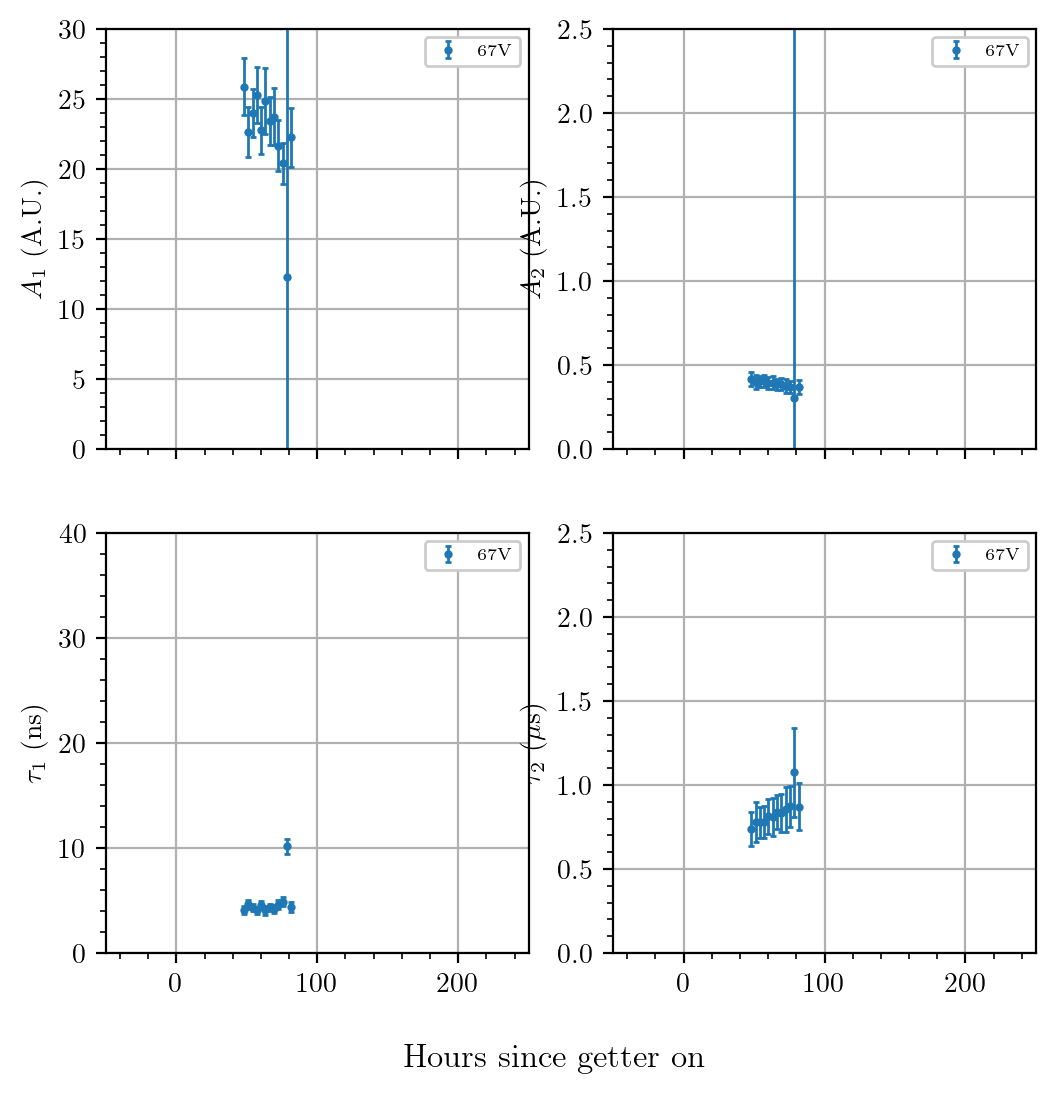

In [59]:
# Make plots for all parameters
# Triplet evolution
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False)
fig.set_size_inches(6, 6)

axs[0, 0].errorbar(
    triplet_fit['days']*24,
    triplet_fit['a1'],
    yerr=triplet_fit['a1err'],
    label=f'67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[0, 0].set_ylabel(r'$A_1$ (A.U.)')
axs[0, 0].set_ylim(0,30)

axs[0, 1].errorbar(
    triplet_fit['days']*24,
    triplet_fit['a2'],
    yerr=triplet_fit['a2err'],
    label=f'67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[0, 1].set_ylabel(r'$A_2$ (A.U.)')
axs[0, 1].set_ylim(0,2.5)

axs[1, 0].errorbar(
    triplet_fit['days']*24,
    triplet_fit['tau1']*1e3,
    yerr=triplet_fit['tau1err']*1e3,
    label=f'67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[1, 0].set_ylabel(r'$\tau_1$ (ns)')
axs[1, 0].set_ylim(0,40)

axs[1, 1].errorbar(
    triplet_fit['days']*24,
    triplet_fit['tau2'],
    yerr=triplet_fit['tau2err'],
    label=f'67V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[1, 1].set_ylabel(r'$\tau_2$ ($\mu$s)')
axs[1, 1].set_ylim(0,2.5)

for i in range(2):
    for j in range(2):
        axs[i, j].legend(loc='upper right',fontsize=6)
        axs[i, j].minorticks_on()
        axs[i, j].grid()
        axs[i, j].set_xlim(-50,250)
fig.supxlabel('Hours since getter on')